
##### Syed Ali Alim Rizvi

ref:
folds: https://gist.github.com/dsparks/3695362

# Model Selection

In [1]:
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.5.1"Warning message:
"package 'ggplot2' was built under R version 3.5.1"

### K-fold Cross Validation

#### K-Fold Cross Validation Function

In [2]:
t1a.train <- read.csv('KNN_train.csv')
t1a.test <- read.csv('KNN_test.csv')

In [3]:
train.data <- t1a.train[,1, drop=0]
train.label <- t1a.train[,2]
test.data <- t1a.test[,1, drop=0]
test.label <- t1a.test[,2]

In [2]:
# KNN function 
knn <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
       
    #create storage for regression predictions
    test.label <- rep(0,test.len)
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        #test.label[i]<- (majority(train.label[nn]))
        test.label[i]<- (mean(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

#### Checking CV function against Training Data

In [6]:
#chaning the function to include different K values
cvk <- function(data, label, numFold=10){
    
    #initialize seed
    set.seed(123)
    
    #create folds of the dataset
    folds <- split(sample(nrow(data), nrow(data), replace=FALSE), as.factor(1:numFold))
    
    #create a dataframe to store the error values for each fold
    miss <- as.data.frame(matrix(0, nrow=10, ncol=20))
    for (i in 1:20){
        names(miss)[i] <- paste('K', i, sep='')
    }
    
    #for each fold calculate the sse
    for(i in 1:numFold){
        
        #obtain the testing and training data sets for the current fold
        test.data <- data[folds[[i]], , drop=0]
        test.label <- label[folds[[i]]]
        train.data <- data[-folds[[i]], , drop=0]
        train.label <- label[-folds[[i]]]
        
        #calculate for all neighbours
        for (neigbours in 1:20) {
            
            #calculate the sse error and add it to the matix
            miss[i,neigbours] <- sum((test.label - knn(train.data, train.label, test.data, K=neigbours))^2)
            
        }
        
        
    }
    
    return(miss)

}

In [7]:
sse <- cvk(train.data, train.label, 10)
avg.sse <- apply(sse, 2, mean)

Warning message in split.default(sample(nrow(data), nrow(data), replace = FALSE), :
"data length is not a multiple of split variable"

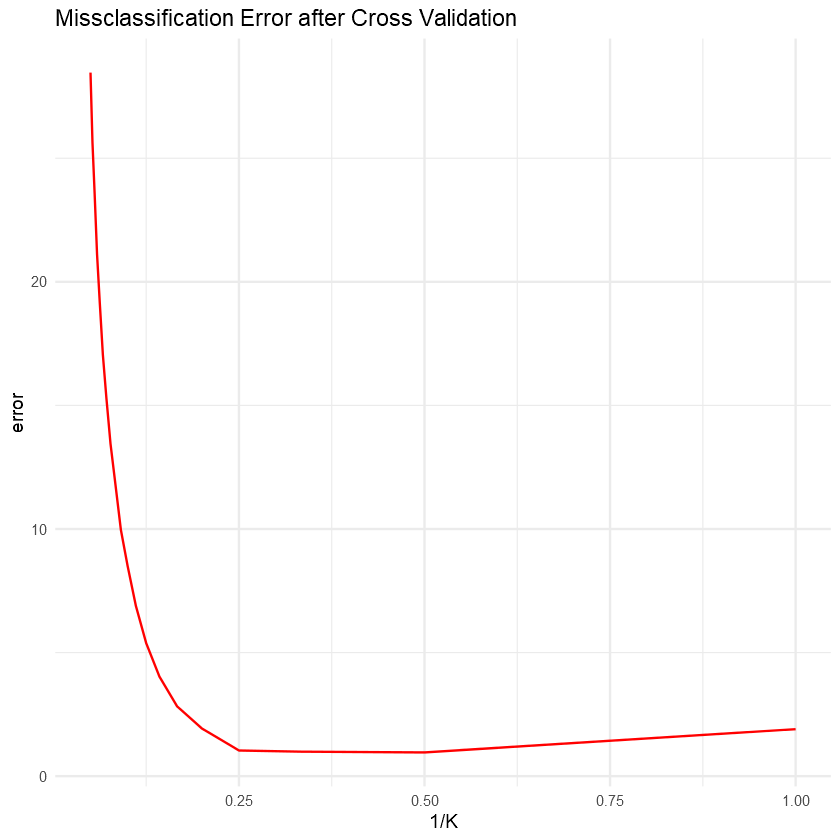

In [8]:
# plot misclassification percentage for train and test data sets
final.sse <- melt(avg.sse)
rownames(final.sse) <- NULL
final.sse$K <- 1:20
names(final.sse)[1] <- 'error'

ggplot(data=final.sse, aes(x=1/K, y=error)) + geom_line(color='red') +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error after Cross Validation")

#### Optimum Value for K

In [9]:
ind <- which.min(avg.sse)
avg.sse[ind]

K2 
0.96108

The minimum cross validated error from the train data set is now coming out to be at `K = 2`


After 10 folds we can see that on average **K=2** performs better than other K values. 